In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import asdict

import json, os, sys

sys.path.append('..')
from synthetic_experiments.config import CorrelationExperimentConfig
import synthetic_experiments.experiments as exp
from synthetic_experiments import viz
from synthetic_experiments import dgp

In [2]:
cfg = CorrelationExperimentConfig(
    n_judges=50,
    n_trials=5,
    resp_set_configs=[(100,2,3), (100,3,5),  (100,3,7), (100,4,7),  (100,4,8),
                      (100,4,10), (100,4,12), (100,5,8), (100,5,12), (100,5,20),
                      (100,3,3), (100,4,4), (100,5,5), (100,6,6)],
    taus=[0.3, 0.5, 0.7],
    judge_eps_min = 0.02,
    judge_eps_max = 0.5,
    constrain_judge = [True, False],
    selection_configs = {
        'Randomized': {
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 0,
            'judge_beta': 0
        },'Human: Neg., Judge: Pos.': {
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 1,
            'judge_beta': 2
        },'Human: Pos., Judge: Neg.': {
            'human_order': 'increasing',
            'judge_order': 'decreasing', 
            'human_beta': 2,
            'judge_beta': 1
        }
    }
)

tag = 'metric_correlations'
config_dict = asdict(cfg)
with open(f'results/{tag}.json', 'w') as f:
    json.dump(config_dict, f, indent=2)

# Run experiment and save results to a csv
df = exp.run_metric_correlation_experiment(cfg)
df.to_csv(f'../results/{tag}.csv', index=False)

# Spearman correlation between human--judge agreement metrics and downstream metrics - Figure 34

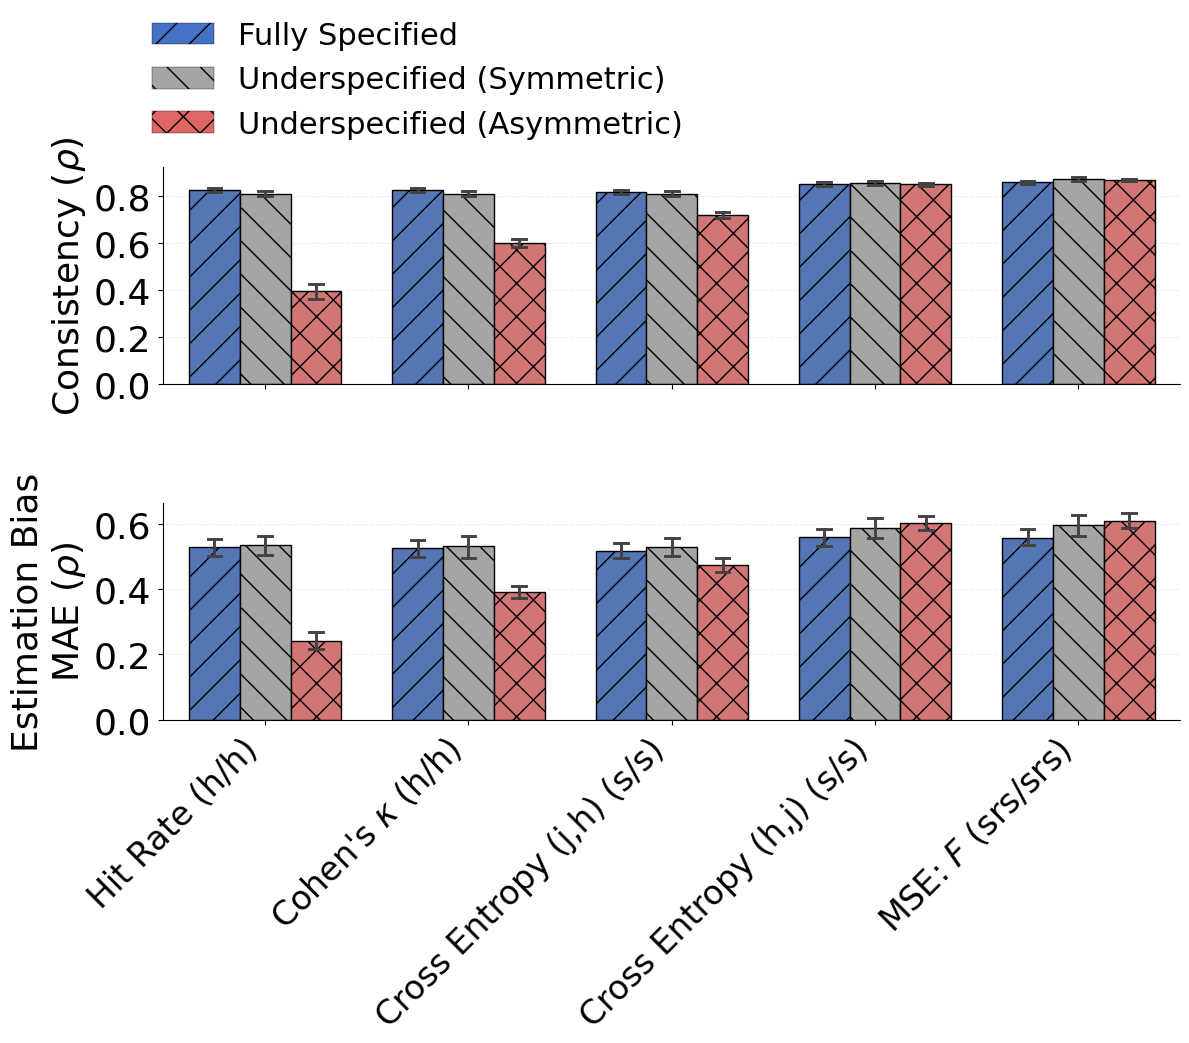

In [3]:
tag = 'metric_correlations'
df = pd.read_csv(f'../results/{tag}.csv')

# Create the new variable using numpy.select
conditions = [
    df['n_options'] == df['n_response_sets'],
    (df['n_options'] < df['n_response_sets']) & (df['human_beta'] == df['judge_beta']),
    (df['n_options'] < df['n_response_sets']) & (df['human_beta'] != df['judge_beta']),
]
settings = ['Fully Specified', 'Underspecified (Symmetric)', 'Underspecified (Asymmetric)']

# Add the new variable to the dataframe
df['category'] = np.select(conditions, settings, default='Other')
cols = ['HR_h_h', 'Cohen_kappa_h_h', 'CE_lh_s_s', 'CE_hl_s_s', 'MSE_srs_srs', 'consistency', 'bias_mae', 'bias' ]
pdf = df[(df['constrain_judge'] == True)] 

plt.style.use('seaborn-v0_8-paper') 
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'grid.color': '#E5E5E5'
})

corrdf = viz.compute_corr_df(pdf, cols, target_metrics=['consistency', 'bias_mae'])
viz.plot_corr_df(corrdf, settings, cols, figsize=(12,9))
plt.savefig('../figures/corr_plot.pdf', dpi=400, bbox_inches='tight')


In [89]:
cfg = CorrelationExperimentConfig(
    n_judges=40,
    n_trials=1,
    resp_set_configs=[(20,2,2)],
    taus=[0.5],
    judge_eps_min = 0.03,
    judge_eps_max = 0.18,
    constrain_judge = [True],
    selection_configs = {
        'Human: Neg., Judge: Pos.': {
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 1,
            'judge_beta': 2
        }
    }
)

tag = 'fullyspecified_scatter_trial'
config_dict = asdict(cfg)
with open(f'../results/{tag}.json', 'w') as f:
    json.dump(config_dict, f, indent=2)
    
df = exp.run_metric_correlation_experiment(cfg)
df.to_csv(f'../results/{tag}.csv', index=False)


running tau: 0.5 human_order: decreasing, judge_order: increasing, human_beta: 1, judge_beta: 2


# Illustration of saturation effects with categorical human--judge agreement metrics - Figure 35

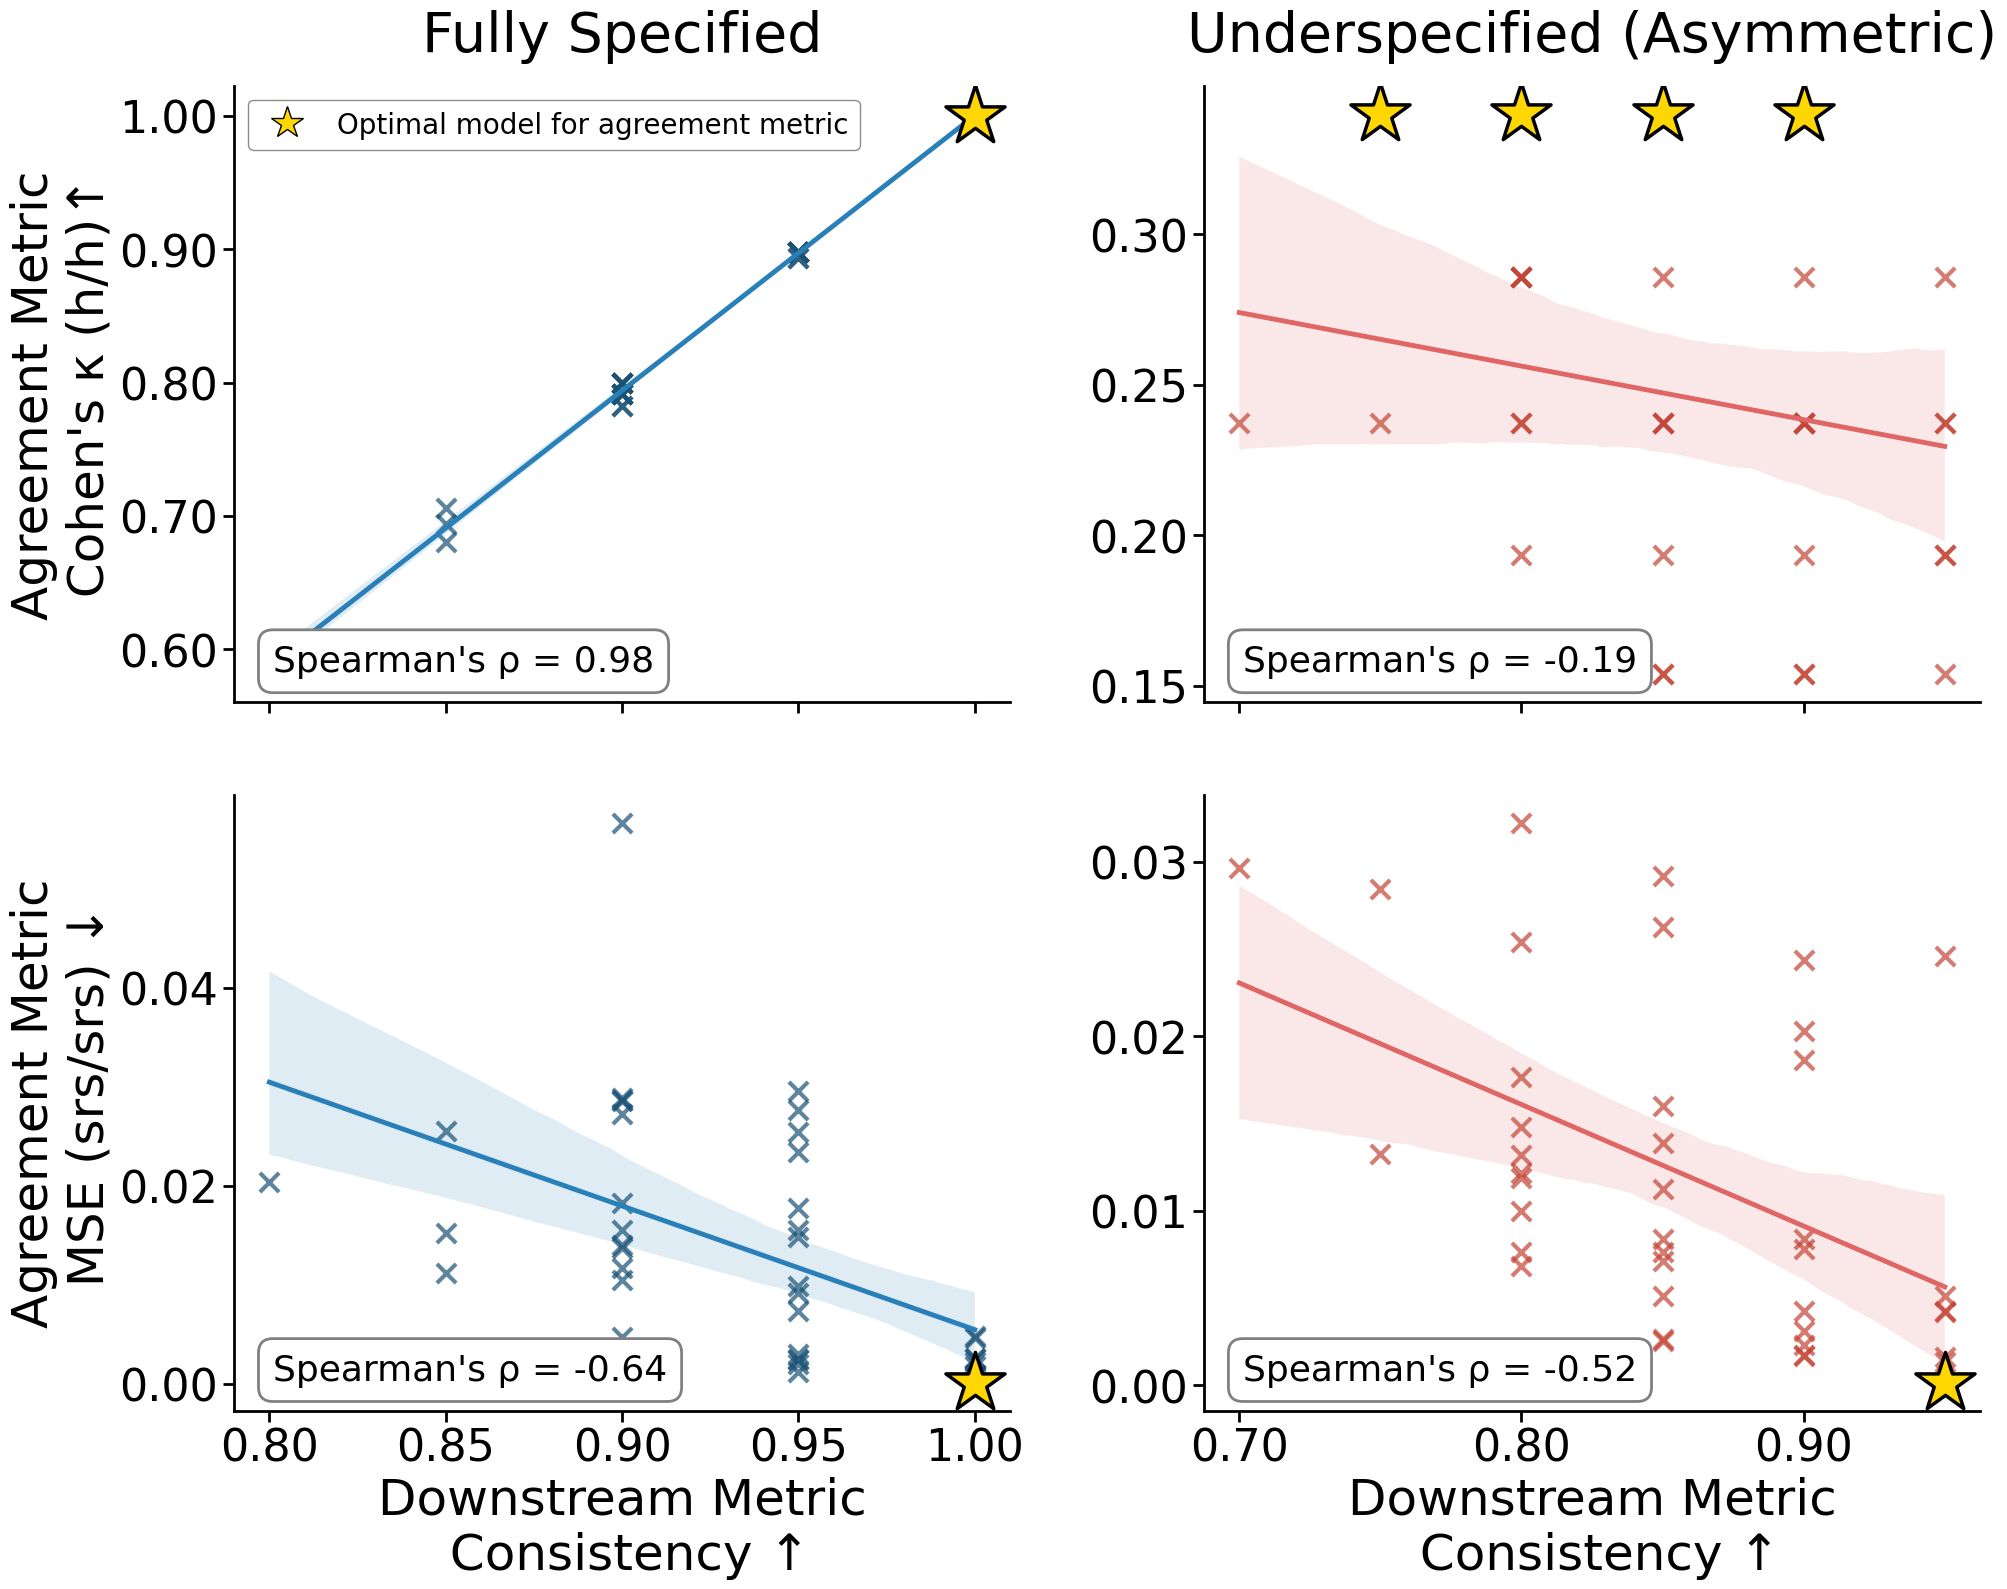

In [2]:
# Load your data
sdf = pd.read_csv('../results/fullyspecified_scatter_trial.csv')
udf = pd.read_csv('../results/underspecified_scatter_trial.csv')

# Call the function to create the plot
fig, axes = viz.plot_metric_consistency_comparison(
    sdf, 
    udf, 
    save_path='../figures/rank_consistency_visualization.pdf'
)

# Display the plot in the notebook
plt.show()